<h1 align="center"> Read Multiple Data Sets in a Single DataFrame </h1>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML
# Set the format for floating point numbers to show no decimal places
pd.set_option('display.float_format', lambda x: '%.0f' % x)
# To display plots inline within the notebook
%matplotlib inline
# Set the notebook width to 100%
display(HTML("<style>.container { width:100% !important; }</style>"))

### Reading Submission Data Sets for All Quarters of 2022 from [Financial Statement Data Sets](https://www.sec.gov/dera/data/financial-statement-data-sets)

In [2]:
# Setting low_memory parameter to False to prevent mixed type inference and default_na parameter to False so that empty strings are not parsed as NaN.
filingsQ1 = pd.read_csv('data/2022q1/sub.txt', sep='\t', low_memory=False, keep_default_na=False)
filingsQ2 = pd.read_csv('data/2022q2/sub.txt', sep='\t', low_memory=False, keep_default_na=False)
filingsQ3 = pd.read_csv('data/2022q3/sub.txt', sep='\t', low_memory=False, keep_default_na=False)
filingsQ4 = pd.read_csv('data/2022q4/sub.txt', sep='\t', low_memory=False, keep_default_na=False)
print('Sum of Filings:', str(len(filingsQ1) + len(filingsQ2) + len(filingsQ3) + len(filingsQ4)))

Sum of Filings: 97813


### Using Concat Function to Create a Single Filings DataFrame for All 4 Quarters

In [3]:
# Setting ignore_index to True so that the rows in concatenated data frame will be indexed from 0 to n-1
filings = pd.concat([filingsQ1, filingsQ2, filingsQ3, filingsQ4], ignore_index=True)
print('Total num of Filings in filings DataFrame:', str(len(filings)))

Total num of Filings in filings DataFrame: 97813


### Look at the Contents of the First Row of filings Data Frame

In [4]:
filings[0:1]

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000016099-22-000014,16099,LUBYS INC,5812,US,TX,HOUSTON,77040,13111 NORTHWEST FREEWAY,SUITE 600,...,20220331,,,20220331,2022-03-31 16:22:00.0,0,0,lub-20220327_htm.xml,1,


### Construct a New Column Month using Filed Date

In [5]:
# Integer division of filed date (YYYYMMDD) by 100 to construct year and month (YYYYMM)
filings['Month'] = filings['filed'].apply(lambda x: x//100)

### Look at the Contents of the First Row of filings Data Frame. Notice the New Column Month in YYYYMM Format

In [6]:
filings.head(1)

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks,Month
0,0000016099-22-000014,16099,LUBYS INC,5812,US,TX,HOUSTON,77040,13111 NORTHWEST FREEWAY,SUITE 600,...,,,20220331,2022-03-31 16:22:00.0,0,0,lub-20220327_htm.xml,1,,202203


### Group Filings By Month Column and Compute Group Sizes

In [7]:
filingsGroupedByMonth = filings.groupby('Month').size().reset_index(name='Num. of Filings')
filingsGroupedByMonth

,Month,Num. of Filings
0,202201,5323
1,202202,8593
2,202203,9741
3,202204,7204
4,202205,13959
5,202206,6099
6,202207,5525
7,202208,12563
8,202209,4863
9,202210,5902


### Generate Descriptive Statistics of filingsGroupedByMonth DataFrame

In [8]:
filingsGroupedByMonth.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month,12,202206,4,202201,202204,202206,202209,202212
Num. of Filings,12,8151,3279,4863,5515,6652,10444,13959


### Visualize Monthly Statistics using Matplotlib Library

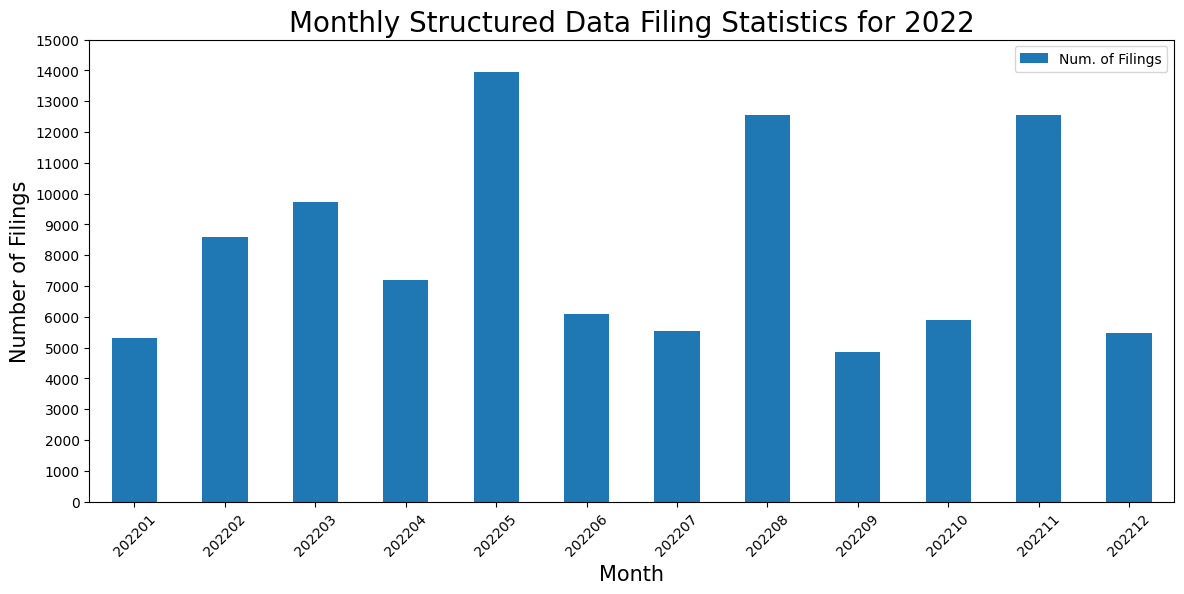

In [9]:
# Create a bar chart with month on x axis and number of filings on y axis
filingsGroupedByMonth.plot(x='Month', y='Num. of Filings', kind='bar', figsize=(14,6))
# Set title and labels for x & y axes
plt.title('Monthly Structured Data Filing Statistics for 2022',fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Filings', fontsize=15)
plt.yticks(np.arange(0, 15001, step=1000))
plt.xticks(rotation=45)
# Save the bar chart as a file in images folder
plt.savefig('images/MonthlyStats2022.jpg')
plt.show()